In [1]:
#定义实例
#训练数据fit
#预测predict

#knn
    #通过计算待分类数据点与已有数据集中的所有数据点的距离.
    #取距离最小的前K个点,根据'少数服从多数'的原则,将这个数据点划分为出现次数最多的那个类别
#sklearn.neighbors.KNeighborsClassifier
    #n_neighbors:用于指定分类器中K的大小(默认为5)
    #weight:设置选中K个点对分类结果影响的权重,默认为uniform,可以选择distance代表越近的点权重越高,或者自定义函数
    #algorithm:设置用于计算临近点的方法,因为当数据量很大的情况下计算当前点和所有点的距离再选出最近的k个点是非常费时的,
                #选项中有ball_tree,kd_tree,brute,默认为auto
    #leaf_size,int(*30),leaf size passed to BallTree or KDTree
    #p,inter(*2),明氏距离参数,1,曼哈顿距离;欧式距离,2;其它.
    #metric,距离测度,默认为minkowski
    #metric_params:距离测度的参数
    #n_job:并行运算参数,-1代表CPU的所有核心数,默认为1,不影响fit

#method
    #fit()用于训练,predict()用于预测
    #get_params([deep])
    #kneighbors([X,n_neighbors,return_distance])找到某个点的K-neighbors
    #kneighbors_graph([X,n_neighbors,model])计算X中点的K-neighbors加权图
    #predict(X)
    #predict_proba(X)
    #score(X,y[,sample_weight]),平均准确率
    #set_params
#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, 
#weights=’uniform’, algorithm=’auto’, leaf_size=30,
#p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

In [2]:
#决策树
    #决策树是一种树形结构的分类器,通过顺序查询分类点的属性决定分类点最终的类别
    #通常根据特征的信息增益等指标构建.
#sklearn.tree.DecisionTreeClassifier
    #criterion:用于选择属性的准则,gini,或entropy
    #max_features:在决策树节点进行分裂时,从多少个特征中选择最优特征.可以设定固定数目,百分比或者其它标准,默认使用所有特征.
    #splitter,选取最优节点的策略,*best/random
    #max_depth,树的最大深度
    #min_samples_split,进行节点分支的最小样本数,int(*2)/float(代表百分比)
    #min_samples_leaf,最小叶节点样本数,默认为1
    #min_weight_fraction_leaf,叶节点的最小权重,默认为0,即等权
    #random_state,int/RandomState instance/None(np.random)
    #min_impurity_decrease,进行节点分支的最小纯度要求,分支导致的纯度下降大于该值则进行分支
    #min_impurity_split,早停的门槛值
    #calss_weight,dict/list of dict/balanced/*None,类权重
    #presort,是否进行预排序
    
#attribute
    #class_,类标签
    #feature_importances_
    #max_features_
    #n_classes_
    #n_features_
    #n_outputs_
    #tree_
#method
    #
    #apply(X[, check_input])	Returns the index of the leaf that each sample is predicted as.
    #decision_path(X[, check_input])	Return the decision path in the tree
    #fit(X, y[, sample_weight, check_input, …])	Build a decision tree classifier from the training set (X, y).
    #get_params([deep])	Get parameters for this estimator.
    #predict(X[, check_input])	Predict class or regression value for X.
    #predict_log_proba(X)	Predict class log-probabilities of the input samples X.
    #predict_proba(X[, check_input])	Predict class probabilities of the input samples X.
    #score(X, y[, sample_weight])	Returns the mean accuracy on the given test data and labels.
    #set_params(**params)	Set the parameters of this estimator.

In [3]:
#交叉验证
#from sklearn.model_selection import cross_val_score
#clf=DCT()
#data=load_iris
#cross_val_score(clf,data.data,data.target,cv=10)

In [1]:
#朴素贝叶斯,生成式算法,适合小规模数据
    #对于给定数据,首先基于特征的条件独立假设,学习输入输出的联合概率分布,
    #然后基于此模型,对于给定的输入x,利用贝叶斯定理求出后验概率最大的输出y
#sklearn.naive_bayes
    #naive_bayes.GussianNB,高斯朴素贝叶斯
    #multinomialNB Naive Bayes.针对多项式模型的朴素贝叶斯分类器
    #bernoulliNB Naive Bayes针对多元伯努利模型的朴素贝叶斯分类器
    #区别在于假设某一特征的所有属于某个类别的观测值符合特定分布
#naive_bayes.GussianNB
    #priors,给定各个类别的先验概率,如果为空,则按训练数据的实际情况进行统计,如果给定先验概率,则在训练过程中不能更改
    
    #method
    #fit(X,y[,sample_weight]),trainning
    #get_params([deep]),获取参数
    #patial_fit(X,y[,classes,sample_weight])Incremental fit on a batch of samples
    #predict(X),分类
    #predict_log_proba(X),返回后验概率
    #predict_proba
    #score(X,y[,sample_weight])返回训练的平均准确率
    #set_params(),设置回归参数

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer#数据预处理模块
from sklearn.model_selection import train_test_split#自动生成训练集和测试集的模块
from sklearn.metrics import classification_report#预测结果评估模块

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.naive_bayes import GaussianNB as NB

def load_dataset(feature_path,label_path):
    feature=np.ndarray(shape=(0,41))#41列,np.array只是一个便捷的函数，用来创建一个ndarray，它本身不是一个类
    label=np.ndarray(shape=(0,1))#1列,ndarray(shape=(m,n))创建m个数组,每个数组有n个元素,如不为零,等同于empty
    for file in feature_path:
        df=pd.read_table(file,delimiter=',',na_value='?',header=None)#读入数据
        imp=Imputer(missing_values='NaN',strategy='mean',axis=0)#定义以mean策略补齐缺失值的Imputer实例,mean/median/most_frequent
        imp.fit(df)#训练数据
        df=imp.transform(df)##应用实例,补齐数据
        feature=np.concatenate((feature,df))#默认为按行合并,即axis=0
        
    for file in label_path:
        df=pd.read_table(file,header=None)
        label=np.concatenate((label,df))
        
    label=np.ravel(label)#将多维数组降为一维,flatten返回一个拷贝,不影响原数组,而ravel,返回一个视图,影响原数组
    return feature,label
if __name__=='__main__':
    feature_path=['A/A.feature','B/B.feature','C/C.feature']
    label_path=['A/A.label','B/B.label','C/C.label']
    #将前4个数据作为训练集读入
    x_train,y_train=load_dataset(feature_path[:2],label_path[:2)
    #将后4个数据作为测试集读入
    x_test,y_test=load_dataset(feature_path[2:],label_path[2:])
    
    #使用全量数据作为训练集,借助train_test_split函数将训练集打乱
    x_train,x_,y_train,y_=train_test_split(x_train,y_train,test_size=0.0)
    
    #创建k近邻分类器,并在测试集上进行预测,使用默认参数
    print('start training knn')
    knn=KNN().fit(x_train,y_train)
    pre_knn=knn.predict(x_test)
    print('knn done!')
    
    #创建决策树分类器,并在测试集上进行预测
    print('start training DT')
    dt=DT().fit(x_train,y_train)
    pre_dt=dt.predict(x_test)
    print('dt done!')
    
    #创建贝叶斯分类器
    print('start training NB')
    nb=NB().fit(x_train,y_train)
    pre_nb=nb.predict(x_test)
    
    #预测结果度量,precision,recall,f1-score,support
    print(classification_report(y_test,pre_knn))
    print(classification_report(y_test,pre_dt))
    print(classification_report(y_test,pre_nb))


SyntaxError: invalid syntax (<ipython-input-1-9c0504e81abf>, line 32)

In [11]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer#数据预处理模块
from sklearn.model_selection import train_test_split#自动生成训练集和测试集的模块
from sklearn.metrics import classification_report#预测结果评估模块

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.naive_bayes import GaussianNB as NB
from sklearn import svm


pd.read_table?
np.concatenate?
np.ravel?
classification_report?
train_test_split?
pd.read_csv().sort_index?
#int,random seed sequence
svm.SVC?

Object `sort_index` not found.


In [ ]:
pd.read_csv().sort_index

In [ ]:
pd.read_csv().sort_index

In [ ]:
import pandas as pd
import numpy as np
import sklearn.svm as svm
import sklearn.cross_validation as cv

#parse_datas=[0],以第0列为日期列
# parse_dates : boolean or list of ints or names or list of lists or dict, default False

#     * boolean. If True -> try parsing the index.
#     * list of ints or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3
#       each as a separate date column.
#     * list of lists. e.g.  If [[1, 3]] -> combine columns 1 and 3 and parse as
#       a single date column.
#     * dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call result
#       'foo'
#index_col=0,以第0列为索引
data=pd.read_csv('sotck.csv',encoding='gbk',parse_dates=[0],index_col=0)
#按索引排序,索引所在维数为0,即按行索引进行排列,而非按照值,sort,order
data.sort_index(0,ascending=True,inplace=True)

dayfeature=150
featurenum=5*dayfeature
x=np.zeros((data.shape[0]-dayfeature,featurenum+1))
y=np.zeros((data.shape[0]-dayfeature))

for i in range(data.shape[0]-dayfeature):
    x[i,0:featurenum]=np.array(data[i:i+dayfeature]\
                               [[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]\
                              ).reshape((1,featurenum))
    #ix,indexer,索引,类似于iloc,loc
    x[i,featurenum]=data.ix[i+dayfeature][u'开盘价']#今天的开盘价
for i in range(data.shape[0]-dayfeature):
    if data.ix[i+dayfeature][u'收盘价']>=data.ix[i+dayfeature][u'开盘价']:
        y[i]=1
    else:
        y[i]=0

clf=svm.SVC(kernel='rbf')
#'linear', 'poly', *'rbf', 'sigmoid', 'precomputed'
result=[]
for i in range(5):
    x_train,x_test,y_train,y_test=cv.train_test_split(x,y,test_size=0.2)
    
    clf.fit(x_train,y_train)
    result.append(np.mean(y_test==clf.predict(x_test)))
    
    print(result)


In [10]:
frame=pd.DataFrame(pd.Series([3,5,2,6,9,23,12,34,12,15,11,0]).reshape(3,4),columns=['c','f','d','a'],index=['C','A','B'])

print(frame)
frame.sort_index(0,ascending=True)
frame.ix?

    c   f   d   a
C   3   5   2   6
A   9  23  12  34
B  12  15  11   0


E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


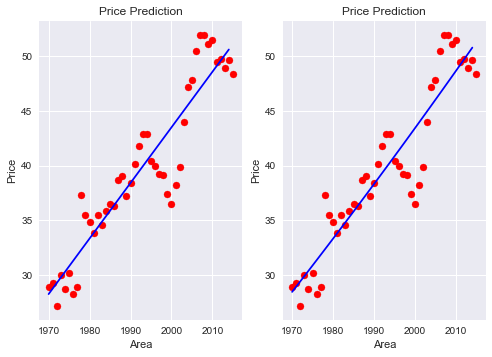

In [27]:
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import matplotlib 
import numpy as np
from sklearn.preprocessing import PolynomialFeatures as PLN
matplotlib.style.use('seaborn')

dataset_X=[]
dataset_Y=[]
fr=open('C:\\Users\\hzg0601\\Desktop\\Rcode\\price.txt','r')
lines=fr.readlines()
for line in lines:
    items=line.strip().split('\t')
    dataset_X.append(int(items[0]))
    dataset_Y.append(float(items[1]))
    
length=len(dataset_X)
dataset_X=np.array(dataset_X).reshape(-1,1)
dataset_Y=np.array(dataset_Y).reshape(-1,1)

minX=min(dataset_X)
maxX=max(dataset_X)
X=np.arange(minX,maxX).reshape(-1,1)

linear=lm.LinearRegression()
linear.fit(dataset_X,dataset_Y)

#fit_intercept=True, normalize=False, copy_X=True, n_jobs=1

poly=PLN(degree=2)
#degree=2, interaction_only=False, include_bias=True
X_poly=poly.fit_transform(dataset_X)
#Fits transformer to X and y with optional parameters fit_params
#and returns a transformed version of X.
lin_reg=lm.LinearRegression()
lin_reg.fit(X_poly,dataset_Y)

plt.subplot(121)
plt.scatter(dataset_X,dataset_Y,color='red')
plt.plot(X,linear.predict(X),color='blue')
#plt.plot(X,lin_reg.predict(poly.fit_transform(X)),color='m')
plt.xlabel('Area')
plt.ylabel("Price")
plt.title('Price Prediction')

plt.subplot(122)
plt.scatter(dataset_X,dataset_Y,color='red')
plt.plot(X,lin_reg.predict(poly.fit_transform(X)),color='blue')
plt.xlabel('Area')
plt.ylabel("Price")
plt.title('Price Prediction')

plt.show()
lm.LinearRegression?
poly.fit_transform?

In [28]:
import sklearn
dir(sklearn)

['_ASSUME_FINITE',
 '__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_contextmanager',
 'base',
 'clone',
 'config_context',
 'exceptions',
 'externals',
 'feature_selection',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random_projection',
 're',
 'set_config',
 'setup_module',
 'svm',
 'sys',
 'utils',
 'warnings']

In [29]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _isotonic
    base
    calibration
    cluster (package)
    covariance (package)
    cross_decomposition (package)
    cross_validation
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    externals (package)
    feature_extraction (package)
    feature_selection (package)
    gaussian_

In [30]:
#对于beta=(X'X){-1}X'y,若某些列线性相关性较大,即训练样本中某些属性线性相关,就会导致X'X的值接近0,在(X'X){-1},时就会出现不稳定性
#
#L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择
#L2正则化可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合,lamda越大,系数越小

#sklearn.linear_model.ridge
    #alpha,正则化因子,对应于损失函数中α
    #fit_intercept,表示是否计算截距
    #solver,设置计算参数的方法,可选参数'auto'/'svd'/sag'

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn import cross_validation as cv
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as PLN

data=np.genfromtxt('data.txt')
#使用numpy的方法从txt文件中加载数据
plt.plot(data[:,4])
X=data[:,:4]
y=data[:,4]
poly=PLN(6)
X=poly.fit_transform(X)
train_set_X,test_set_X,train_set_y,test_set_y=cv.train_test_split(X,y,test_size=0.2,random_state=0)
clf=Ridge(alpha=1.0,fit_intercept=True)#生成Ridge回归实例
clf.fit(train_set_X,train_set_y)
clf.score(test_set_X,test_set_y)#计算回归曲线的拟合优度,

start=200
end=300
y_pre=clf.predict(X)
time=np.arange(start,end)
plt.plot(time,y[start:end],'b',label='real')
plt.plot(time,y_pre[start:end],'r',label='predict')
plt.legend(loc='upper left')
plt.show()
